In [1]:
import torch
import torchvision
from skimage import io, transform
from torch import nn

import numpy as np

from training.losses import *
from training.train import *
from training.plots import *
from models.gan import *

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
BATCH_SIZE = 32
LR = 3e-4
BETAS = 0.9, 0.999

In [3]:
data = torchvision.datasets.MNIST("./../data/mnist", download=True, transform=lambda x: torch.tensor(transform.resize(np.array(x), (9, 9))).unsqueeze(0))
train_data = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE)

In [4]:
generator_model = Generator(81)
discriminator_model = Discriminator()

In [5]:
generator_optimizer = torch.optim.Adam(generator_model.parameters(), lr=LR, betas=BETAS)
discriminator_optimizer = torch.optim.Adam(discriminator_model.parameters(), lr=LR, betas=BETAS)

In [6]:
trainer = Trainer(generator_model, discriminator_model,
                  GANLoss(BATCH_SIZE, 'cpu'),
                  discriminator_optimizer, generator_optimizer, 'cpu')
plotter = Plotter(generator_model, 'cpu')

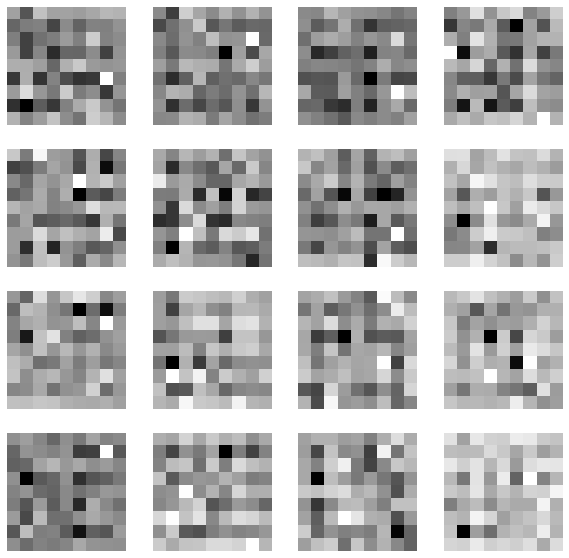

In [7]:
plotter.plot_generator_results()

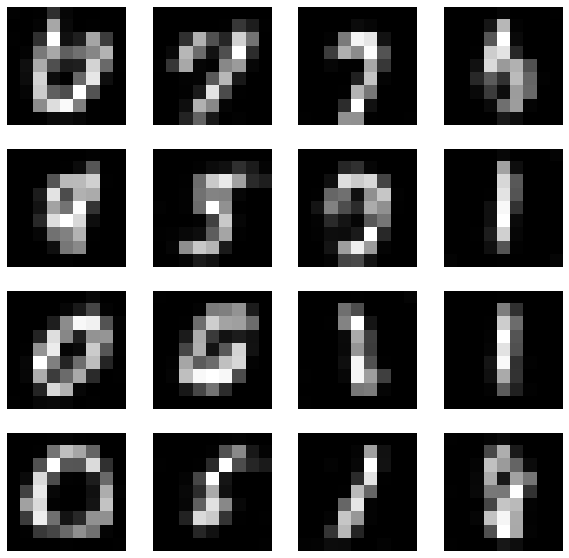

In [8]:
res = trainer.train(train_data, 10)

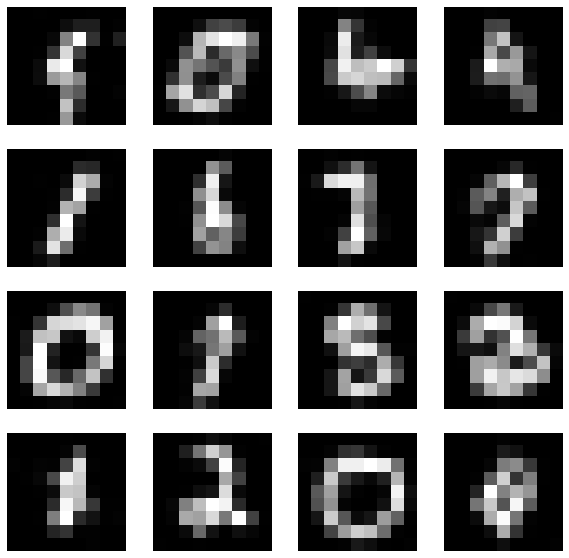

In [9]:
plotter.plot_generator_results()

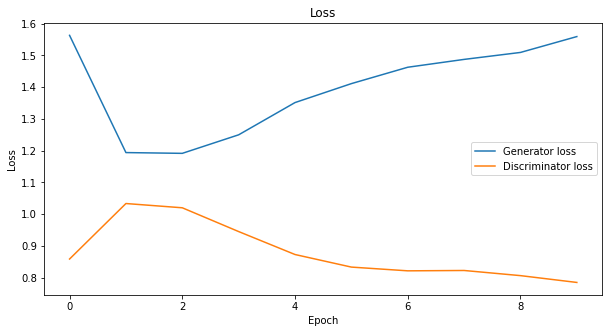

In [10]:
plt.figure(figsize=(10,5))
plt.title("Loss")
plt.plot(res[0],label="Generator loss")
plt.plot(res[1],label="Discriminator loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()